# K-vecinos más próximos

## Definición y resultados asintóticos

Dada una entrada $\boldsymbol{x}$, el clasificador (por los) **$K$ vecinos más próximos** o **K nearest neighbor (KNN)** busca $K$ ejemplos o prototipos más cercanos de $\boldsymbol{x}$ en el conjunto de entrenamiento, $N_K(\boldsymbol{x},\mathcal{D})$, y toma sus etiquetas para derivar una distribución sobre las salidas en la región local alrededor de $\boldsymbol{x}$:
$$p(y=c\mid\boldsymbol{x},\mathcal{D})%
=\frac{1}{K}\sum_{n\in N_K(\boldsymbol{x},\mathcal{D})}\mathbb{I}(y_n=c)$$
Más simplemente, KNN retorna la etiqueta más votada (mayoritaria) si es única; si no, en caso de empate a votos entre dos o más clases, KNN devuelve la etiqueta del prototipo más cercano entre los prototipos de las clases empatadas.

El caso particular $K=1$ es especialmente popular; se conoce como clasificador (por el) **vecino más próximo** o **nearest neighbor (NN)** y su función predictiva es una delta:
$$p(y=c\mid\boldsymbol{x},\mathcal{D})=\delta(c,y_n)%
\quad\text{con conjunto unitario}\quad%
N_1(\boldsymbol{x},\mathcal{D})=\{n\}$$
Conviene destacar que podría no existir un único prototipo más cercano a $\boldsymbol{x}$, sino dos o más empatados a la misma distancia de $\boldsymbol{x}$. En tal caso asumimos que el desempate se decide al azar. Más generalmente, en el caso de KNN, si existen dos o más conjuntos de $K$ prototipos más cercanos a $\boldsymbol{x}$, escogemos uno de ellos al azar. Nótese que el empate a distancias no tiene nada que ver con el empate a votos. Por lo general, la probabilidad de que se produzcan empates a distancia es insignificante, no así la probabilidad de empate a votos; por eso desempatamos al azar en el caso de empates a distancia, pero no en el caso de empate a votos.

Los parámetros principales de KNN son el tamaño del entorno local, $K$, y la distancia $d(\boldsymbol{x},\boldsymbol{x}')$ con la que compara cualquier par de puntos en el espacio de representación de los datos, típicamente $\mathbb{R}^D$. Se suele usar la distancia Euclídea o, más generalmente, la de Mahalanobis:
$$d_M(\boldsymbol{x},\boldsymbol{\mu})=\sqrt{(\boldsymbol{x}-\boldsymbol{\mu})^tM(\boldsymbol{x}-\boldsymbol{\mu})}$$
donde $M$ es una matriz definida positiva; por ejemplo, si $M$ es la identidad $M=I_D$, Mahalanobis coincide con la Euclídea.

En términos asíntóticos, esto es, cuando $N\to\infty$, el clasificador NN comete un error de clasificación no superior a dos veces el de Bayes. Más aún, el error del clasificador KNN converge al de Bayes si $K$ se escoge tal que $K\to\infty$ y $K/N\to 0$; esto se cumple, por ejemplo, tomando $K=\sqrt{N}$.

## Ejemplo

En un problema de clasificación en dos clases, $y\in\{0,1\}$, 5NN para un punto de test $\boldsymbol{x}$ halla $3$ vecinos de la clase $1$ y $2$ de la clase $0$. En este caso, 5NN estima la probabilidad de que $\boldsymbol{x}$ pertenezca a la clase $1$ como:
$$p(y=1\mid\boldsymbol{x},\mathcal{D})=\frac{3}{5}=0.6$$

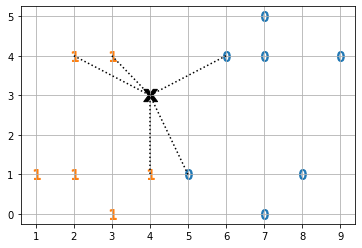

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.neighbors import NearestNeighbors

X0 = np.array(([5, 1], [6, 4], [7, 0], [7, 4], [7, 5], [8, 1], [9, 4]), dtype=float)
X1 = np.array(([1, 1], [2, 1], [2, 4], [3, 0], [3, 4], [4, 1]), dtype=float)
N0 = X0.shape[0]; N1 = X1.shape[0]
X = np.vstack((X0, X1))
y = np.vstack((np.zeros((N0, 1)), np.ones((N1, 1))))
x = np.array(([4, 3])) # <<< test
fig, ax = plt.subplots()
ax.grid(); ax.scatter(*x, c='k', marker=r'$\mathbf{x}$', s=200)
ax.scatter(*X0.T, marker=r'$0$', s=100)
ax.scatter(*X1.T, marker=r'$1$', s=100)
K = 5 # <<< número de vecinos
KNN = NearestNeighbors(n_neighbors=K).fit(X)
_, KNN_ind = KNN.kneighbors([x])
lines = np.zeros((K, 2, 2))
lines[:, 0, :] = np.squeeze(X[KNN_ind, :])
lines[:, 1, :] = np.repeat([x], K, axis=0)
ax.add_collection(LineCollection(lines, colors='black', linestyle='dotted'));